In [29]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten


In [30]:
train_path="LP-IV-datasets/MNIST_Ass2_3/mnist_train.csv"
test_path="LP-IV-datasets/MNIST_Ass2_3/mnist_test.csv"

In [31]:
df_train=pd.read_csv(train_path)

In [32]:
df_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
image_data=df_train.iloc[:,1:].values
labal_data=df_train.iloc[:,0].values

In [34]:
output_folder="images/train"
os.makedirs(output_folder,exist_ok=True)

num_imgs=10000
for i in range(num_imgs):
    pixel_val=image_data[i,:].reshape(28,28)
    label=labal_data[i]

    label_folder=os.path.join(output_folder,str(label))
    os.makedirs(label_folder,exist_ok=True)

    pic_img=os.path.join(label_folder,f"index_{i}.png")
    plt.imsave(pic_img,pixel_val,cmap='gray')

    

In [35]:
df_test=pd.read_csv(test_path)

image_data=df_test.iloc[:,1:].values
labal_data=df_test.iloc[:,0].values

output_folder="images/test"
os.makedirs(output_folder,exist_ok=True)

num_imgs=10000
for i in range(num_imgs):
    pixel_val=image_data[i,:].reshape(28,28)
    label=labal_data[i]

    label_folder=os.path.join(output_folder,str(label))
    os.makedirs(label_folder,exist_ok=True)

    pic_img=os.path.join(label_folder,f"index_{i}.png")
    plt.imsave(pic_img,pixel_val,cmap='gray')


In [36]:
test="images/test"
train="images/train"



In [37]:
train_datagen=ImageDataGenerator(
    rescale=1.0/255
)

test_datagen=ImageDataGenerator(
    rescale=1.0/255
)


In [38]:
train_generator=train_datagen.flow_from_directory(
    train,
    target_size=(28,28),
    batch_size=10000,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True,

)

test_generator=test_datagen.flow_from_directory(
    test,
    batch_size=10000,
    target_size=(28,28),
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True,

)

Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [39]:
x_train,y_train=train_generator[0]
x_test,y_test=test_generator[0]

In [40]:
model=Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(128,activation='relu'),
    # Dropout(0.2),
    Dense(10,activation='softmax')
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [41]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=11)


Epoch 1/11
313/313 [==============================] - 1s 3ms/step - loss: 1.3843 - accuracy: 0.6670 - val_loss: 0.8466 - val_accuracy: 0.8181
Epoch 2/11
313/313 [==============================] - 1s 3ms/step - loss: 0.6754 - accuracy: 0.8483 - val_loss: 0.5677 - val_accuracy: 0.8574
Epoch 3/11
313/313 [==============================] - 1s 3ms/step - loss: 0.5079 - accuracy: 0.8716 - val_loss: 0.4711 - val_accuracy: 0.8761
Epoch 4/11
313/313 [==============================] - 1s 3ms/step - loss: 0.4345 - accuracy: 0.8886 - val_loss: 0.4223 - val_accuracy: 0.8888
Epoch 5/11
313/313 [==============================] - 1s 3ms/step - loss: 0.3925 - accuracy: 0.8976 - val_loss: 0.3897 - val_accuracy: 0.8938
Epoch 6/11
313/313 [==============================] - 1s 3ms/step - loss: 0.3636 - accuracy: 0.9040 - val_loss: 0.3738 - val_accuracy: 0.8967
Epoch 7/11
313/313 [==============================] - 1s 3ms/step - loss: 0.3419 - accuracy: 0.9082 - val_loss: 0.3558 - val_accuracy: 0.9006
Epoch 

In [42]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3167 - accuracy: 0.9100


In [43]:
print("Loss: ",loss," Accuracy: ",accuracy)

Loss:  0.3167063593864441  Accuracy:  0.9100000262260437


313/313 [==============================] - 1s 2ms/step
Actual  6
Predicted  6


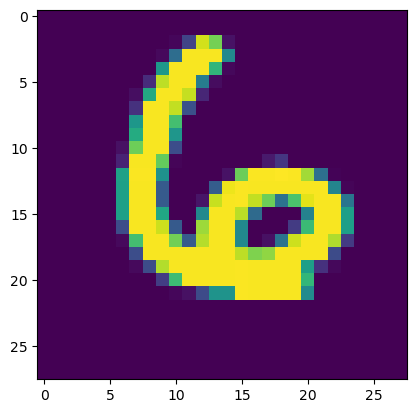

In [56]:
y_pred=model.predict(x_test)
n=98
plt.imshow(x_test[n])
print("Actual ",np.argmax(y_test[n]))
print("Predicted ",np.argmax(y_pred[n]))

In [45]:
history=history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

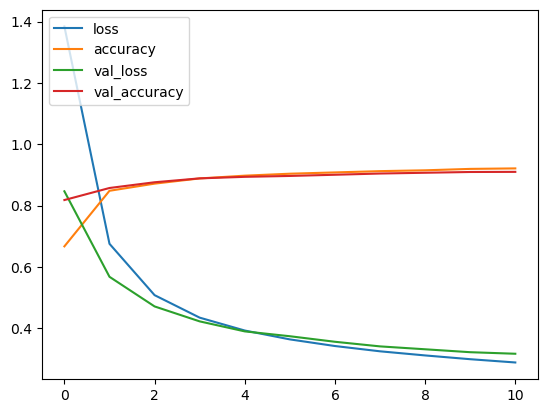

In [46]:
plt.plot(history['loss'])
plt.plot(history['accuracy'])
plt.plot(history['val_loss'])
plt.plot(history['val_accuracy'])
plt.legend(['loss', "accuracy",'val_loss',"val_accuracy"], loc='upper left')

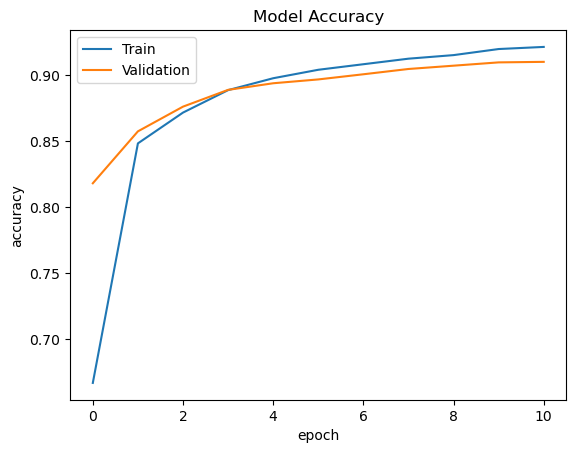

In [47]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', "Validation"], loc='upper left')